In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import os
import time
from IPython.core.display import clear_output
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import lmfit

from meta import MetaAnalyzer
from meta import SlotModel

[[Model]]
    Model(roa0_0_1.tif)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 196
    # data points      = 1500000
    # variables        = 12
    chi-square         = 2.2197e+09
    reduced chi-square = 1479.80002
    Akaike info crit   = 10949505.4
    Bayesian info crit = 10949652.0
[[Variables]]
    y0:   2.40219146 +/- 0.01796511 (0.75%) (init = 0)
    x0:   0.63805755 +/- 0.01020151 (1.60%) (init = 0)
    phi: -0.02689497 +/- 1.1354e-05 (0.04%) (init = -0.04363323)
    py:   181.911799 +/- 0.00517740 (0.00%) (init = 180)
    px:   181.598672 +/- 0.00171729 (0.00%) (init = 183)
    t1:  -0.04100194 +/- 2.5381e-04 (0.62%) (init = 0)
    t2:  -0.04051737 +/- 2.7353e-04 (0.68%) (init = 0)
    dy:   44.8402404 +/- 0.00831745 (0.02%) (init = 44)
    dx:   45.4251284 +/- 0.00419458 (0.01%) (init = 44)
    l:    84.1528873 +/- 0.01684393 (0.02%) (init = 100)
    w:    24.6512648 +/- 0.00839597 (0.03%) (init = 30)
    r:    3.18203700 +/- 0.00513358 (0.16%

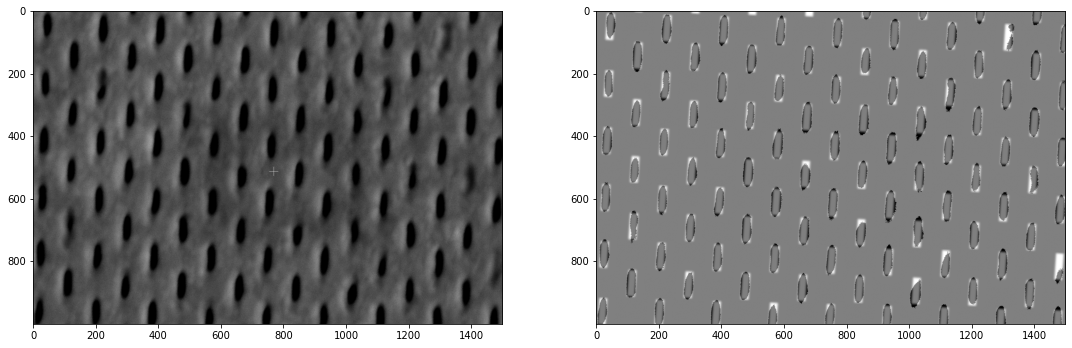

In [2]:
analysis_list = []
canvas_y, canvas_x = (0, 1000), (0, 1500)
min_slot_size = 50
threshold = 40
scale = 500/277
run_fit = True
show_iter_output = True
max_fit_iter = None
init_params = {
    'y0': {
        'value': 0,
        'vary': True,
    },
    'x0': {
        'value': 0,
        'vary': True,
    },
    'py': {
        'value': 180,
        'vary': True,
        'min': 0,
    },
    'px': {
        'value': 183,
        'vary': True,
        'min': 0,
    },
    'dy': {
        'value': 177//4,
        'vary': True,
        'min': 0,
    },
    'dx': {
        'value': 177//4,
        'vary': True,
        'min': 0,
    },
    'l': {
        'value': 200/2,
        'vary': True,
        'min': 0,
        'max': 177,
    },
    'w': {
        'value': 30,
        'vary': True,
        'min': 0,
        'max': 177/4,
    },
    'r': {
        'value': 2,
        'vary': True,
        'min': 0,
    },
    't1': {
        'value': 0,
        'vary': True,
        'min': -pi/2,
        'max': pi/2,
    },
    't2': {
        'value': 0,
        'vary': True,
        'min': -pi/2,
        'max': pi/2,
    },
    'phi': {
        'value': -pi/180*2.5,
        'vary': True,
        'min': -pi/2,
        'max': pi/2,
    }
}
dirpath = os.path.abspath("/mnt/e/Data/JensenLab/FIBImage/Set1_FIB_ellipse")
images = []
for file in os.listdir(dirpath):
    if file.endswith('.tif'):
        images.append(file)
for i, image in enumerate(images):
    print(f"{i} {image}")
# selected_index = 0
selected_index = int(input("Enter the index of the file to be processed"))
clear_output()
for i, name in enumerate(images):
    if i != selected_index: continue
    path = os.path.join(dirpath, name)
    name = name.replace("roa", "").replace(".tif", "")
    args = name.split("_")

    analysis = MetaAnalyzer(path=path, canvas=(canvas_y, canvas_x), min_slot_size=min_slot_size, threshold=threshold, init_params=init_params, scale=scale, verbose=show_iter_output, max_fit_iter=max_fit_iter)
    if run_fit:
        result = analysis.fit_lattice_lmfit()
        analysis_list.append(analysis)
        print(result.fit_report())
        analysis.print_physical_params(result.params)
    analysis.plot_matplotlib()
    # analysis.plot_plotly()